In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('classic')
import matplotlib.ticker as ticker
import seaborn as sns; sns.set()
import pandas as pd
#from mgcpy.independence_tests.mgc.mgc import MGC
#from mgcpy.benchmarks import simulations as sims
from scipy.stats import bernoulli

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
np.random.seed(88889999)
import graspy
from graspy.inference import NonparametricTest
from graspy.embed import AdjacencySpectralEmbed
from graspy.simulations import sbm, rdpg
from graspy.utils import symmetrize
from graspy.plot import heatmap, pairplot
from scipy.stats import bernoulli
from tqdm import tqdm

In [33]:
x = np.random.uniform(.2,.7,100).reshape(-1,1)
y = np.random.uniform(.4,.9,100).reshape(-1,1)
A1 = rdpg(x,
          loops=False,
          rescale=False,
          directed=False)
A2 = rdpg(x,
          loops=False,
          rescale=False,
          directed=False)
A3 = rdpg(y,
          loops=False,
          rescale=False,
          directed=False)

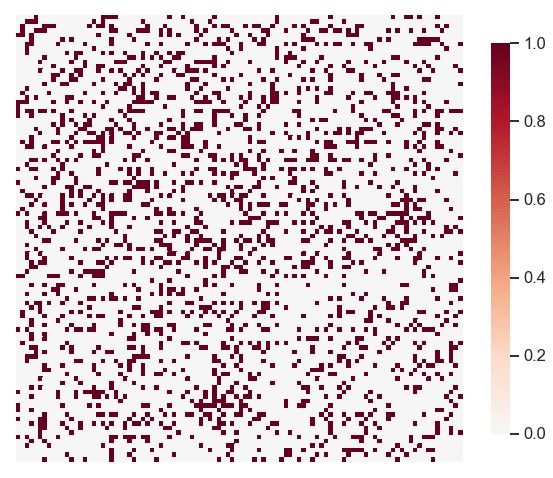

In [34]:
heatmap(A1)
plt.savefig('a1.png')
plt.show()

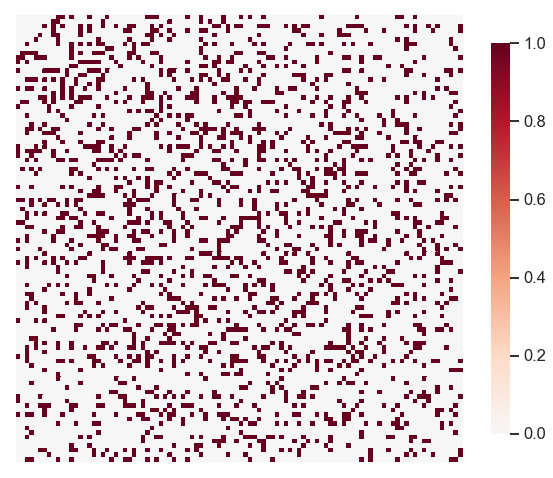

In [35]:
heatmap(A2)
plt.savefig('a2.png')
plt.show()

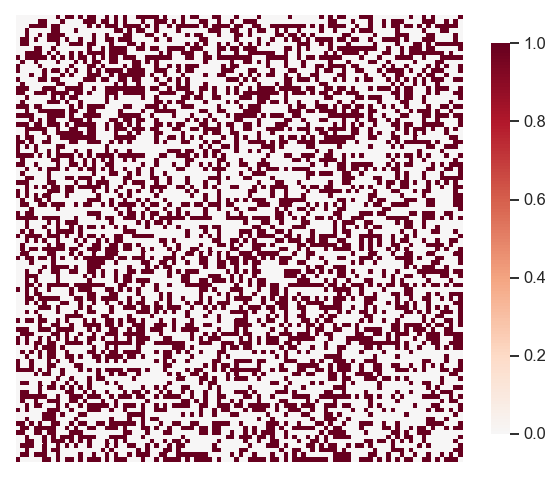

In [36]:
heatmap(A3)
plt.savefig('a3.png')
plt.show()

In [10]:
def get_graph(n, null=True):
    x = np.random.uniform(.2,.7,n).reshape(-1,1)
    y = np.random.uniform(.4,.9,n).reshape(-1,1)
    if null:
        return x, x
    else:
        return x, y
    return x,y
    
def get_power(n=50, iters=100, n_boot=200, alpha=0.05, null=True):
    x, y = get_graph(n, null=null)
    A1 = rdpg(x,
          loops=False,
          rescale=False,
          directed=False)
    A2 = rdpg(y,
          loops=False,
          rescale=False,
          directed=False)
    npt = graspy.inference.NonparametricTest()
    p = npt.fit(A1, A2)
    sorted_ = np.sort(npt.null_distribution_)
    rej_ind = int(np.ceil(((1 - alpha)*n_boot)))
    critical_value = sorted_[rej_ind]
    rejections = 0
    for i in range(iters):
        A = rdpg(x,
          loops=False,
          rescale=False,
          directed=False)
        B = rdpg(y,
          loops=False,
          rescale=False,
          directed=False)
        npt_2 = graspy.inference.NonparametricTest(n_bootstraps=1)
        npt_2.fit(A,B)
        U = npt_2.sample_T_statistic_
        if U > critical_value:
            rejections += 1
    return rejections/iters

In [13]:
pows = []
x = range(10,101,10)
for _ in tqdm(range(10)):
    xs = []
    for n in x:
        xs.append(get_power(n, null=True))
    pows.append(xs)


100%|██████████| 10/10 [03:32<00:00, 21.39s/it]

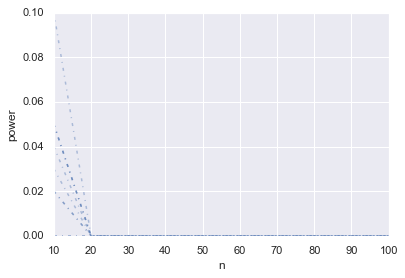

In [24]:
for i in range(10):
    plt.plot(x, pows[i], 'b-.', alpha=0.4)
#plt.plot(x,[0.05]*len(x),'r-.',alpha=0.8)
plt.xlabel('n')
plt.ylabel('power')
#plt.ylim([-0.01,0.01])
plt.savefig('power_curve_null.png')
plt.show()

In [22]:
pows_false = []
x = range(10,101,10)
for _ in tqdm(range(10)):
    xs = []
    for n in x:
        xs.append(get_power(n, null=False))
    pows_false.append(xs)



  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:23<03:28, 23.12s/it]

 20%|██        | 2/10 [00:46<03:05, 23.17s/it]

 30%|███       | 3/10 [01:11<02:45, 23.62s/it]

 40%|████      | 4/10 [01:39<02:30, 25.12s/it]

 50%|█████     | 5/10 [02:05<02:07, 25.43s/it]

 60%|██████    | 6/10 [02:30<01:40, 25.09s/it]

 70%|███████   | 7/10 [02:54<01:14, 24.90s/it]

 80%|████████  | 8/10 [03:18<00:49, 24.70s/it]

 90%|█████████ | 9/10 [03:43<00:24, 24.55s/it]

100%|██████████| 10/10 [04:07<00:00, 24.63s/it]

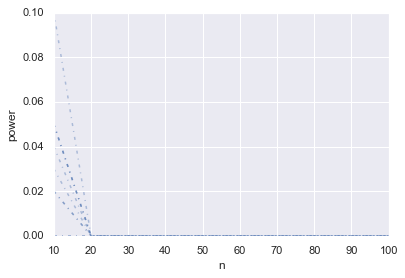

In [25]:
for i in range(10):
    plt.plot(x, pows[i], 'b-.', alpha=0.4)
#plt.plot(x,[0.05]*len(x),'r-.',alpha=0.8)
plt.xlabel('n')
plt.ylabel('power')
plt.savefig('power_curve_alt.png')
plt.show()